# PROJECT:- Prediction of Power

# Data Description¶

The objective of this competition is to predict Power generated by the panel.

File descriptions

power_actual - it contains the all details of Power. there are three features "igt", "igh" and "power".


weather_actual- it contains all details of weather like as "Temperature", "Humidity" and etc. There are toal 31 feature.

weather_forecast - test_dataset


##Goal:-

predict amount of Power


# Importing the important libries

In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sns
from scipy import stats
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

# Importing Dataset

In [2]:
act_wthr=pd.read_csv(r'F:\machine learning\climate intern\weather_actuals.csv')
act_pwr=pd.read_csv(r'F:\machine learning\climate intern\power_actual.csv')
frc_pwr=pd.read_csv(r'F:\machine learning\climate intern\weather_forecast.csv')

# A view on Datasets

In [3]:
print("shape of wether dataset{}".format(act_wthr.shape))
print("shape of Power dataset{}".format(act_pwr.shape))
print("shape of frc_pwr{}".format(frc_pwr.shape))

shape of wether dataset(13619, 31)
shape of Power dataset(70080, 5)
shape of frc_pwr(648, 31)


In [4]:
print("head of weather dataset:")
act_wthr.head()

head of weather dataset:


,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,0.83,-9999.0,-9999.0,-9999.0,1007.90,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270,0.45,-9999.0,-9999.0,-9999.0,1008.12,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


In [5]:
print("head of power dataset:")
act_pwr.head()

head of power dataset:


,Unnamed: 0,datetime,ghi,gti,power
0,0,2017-10-01 00:00:00,0.0,0.0,0.0
1,1,2017-10-01 00:15:00,0.0,0.0,0.0
2,2,2017-10-01 00:30:00,0.0,0.0,0.0
3,3,2017-10-01 00:45:00,0.0,0.0,0.0
4,4,2017-10-01 01:00:00,0.0,0.0,0.0


In [6]:
print("head of weather forecast dataset:")
frc_pwr.head()

head of weather forecast dataset:


,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,3.08,NaN,6.42,NaN,1008.45,NaN,0,NaN,NaN,NaN,268.6,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,1,1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,2.94,NaN,6.28,NaN,1008.24,NaN,0,NaN,NaN,NaN,269.1,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2,2,1,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,2.82,NaN,6.08,NaN,1007.90,NaN,0,NaN,NaN,NaN,269.7,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
3,3,1,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,2.63,NaN,5.74,NaN,1007.61,NaN,0,NaN,NaN,NaN,270.4,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
4,4,1,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,2.39,NaN,5.30,NaN,1007.51,NaN,0,NaN,NaN,NaN,271.3,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38


# Data analysis

In [7]:
act_wthr.shape

(13619, 31)

In [8]:
act_pwr.shape

(70080, 5)

In [9]:
act_wthr.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,0.83,-9999.0,-9999.0,-9999.0,1007.90,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270,0.45,-9999.0,-9999.0,-9999.0,1008.12,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


In [10]:
act_wthr.tail()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
13614,13614,1,2019-09-30 13:30:00,2019-09-30 19:00:00,0.16,31.66,29,1,21.19,40,2.72,NaN,4.59,NaN,1007.44,NaN,0,NaN,NaN,NaN,269.6,NaN,0.0,0.0,NaN,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46
13615,13615,1,2019-09-30 14:30:00,2019-09-30 20:00:00,0.16,30.42,28,1,21.35,59,3.24,NaN,5.45,NaN,1008.25,NaN,0,NaN,NaN,NaN,268.7,NaN,0.0,0.0,NaN,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46
13616,13616,1,2019-09-30 15:30:00,2019-09-30 21:00:00,0.18,29.56,27,1,21.61,76,3.34,NaN,5.83,NaN,1008.65,NaN,0,NaN,NaN,NaN,268.4,NaN,0.0,0.0,NaN,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46
13617,13617,1,2019-09-30 16:30:00,2019-09-30 22:00:00,0.30,28.97,27,1,21.99,88,3.22,NaN,5.73,NaN,1008.76,NaN,0,NaN,NaN,NaN,268.7,NaN,0.0,0.0,NaN,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46
13618,13618,1,2019-09-30 17:30:00,2019-09-30 23:00:00,0.35,28.15,26,1,22.09,95,3.14,NaN,6.03,NaN,1008.61,NaN,0,NaN,NaN,NaN,268.7,NaN,0.0,0.0,NaN,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46


from column "datetime_local" we can see that data is noted every hour for two years. so there are 24 data points 
in a day. so in 2 years total datapoints= 24*365*2= 17520. but available data ponits are 13618. Which means that there
are some missing rows in dataset. total missing rows= 17520-13618=3902

In [11]:
24*365*2-13618


3902

In [12]:
act_pwr.head(10)

,Unnamed: 0,datetime,ghi,gti,power
0,0,2017-10-01 00:00:00,0.0,0.0,0.0
1,1,2017-10-01 00:15:00,0.0,0.0,0.0
2,2,2017-10-01 00:30:00,0.0,0.0,0.0
3,3,2017-10-01 00:45:00,0.0,0.0,0.0
4,4,2017-10-01 01:00:00,0.0,0.0,0.0
5,5,2017-10-01 01:15:00,0.0,0.0,0.0
6,6,2017-10-01 01:30:00,0.0,0.0,0.0
7,7,2017-10-01 01:45:00,0.0,0.0,0.0
8,8,2017-10-01 02:00:00,0.0,0.0,0.0
9,9,2017-10-01 02:15:00,0.0,0.0,0.0


In [13]:
act_pwr.tail(10)

,Unnamed: 0,datetime,ghi,gti,power
70070,70070,2019-09-30 21:30:00,0.0,0.0,0.0
70071,70071,2019-09-30 21:45:00,0.0,0.0,0.0
70072,70072,2019-09-30 22:00:00,0.0,0.0,0.0
70073,70073,2019-09-30 22:15:00,0.0,0.0,0.0
70074,70074,2019-09-30 22:30:00,0.0,0.0,0.0
70075,70075,2019-09-30 22:45:00,0.0,0.0,0.0
70076,70076,2019-09-30 23:00:00,0.0,0.0,0.0
70077,70077,2019-09-30 23:15:00,0.0,0.0,0.0
70078,70078,2019-09-30 23:30:00,0.0,0.0,0.0
70079,70079,2019-09-30 23:45:00,0.0,0.0,0.0


from column "datetime" we can see that data is available in interval of 15 min.
so data total data points= 4*24*365*2= 70080. And available rows are 70080. so no missing rows in power dataset.

lets analysis the wether dataset and try to find the missing rows

In [14]:
act_wthr.head(24)

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,0.83,-9999.0,-9999.0,-9999.0,1007.90,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270,0.45,-9999.0,-9999.0,-9999.0,1008.12,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
5,5,1,2017-09-30 23:30:00,2017-10-01 05:00:00,0.0,24.13,24,1,17.84,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
6,6,1,2017-10-01 00:30:00,2017-10-01 06:00:00,0.0,21.87,22,1,17.45,-9999,-9999.00,-9999.0,-9999.0,-9999.0,1008.65,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
7,7,1,2017-10-01 01:30:00,2017-10-01 07:00:00,0.0,25.23,25,1,17.71,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
8,8,1,2017-10-01 02:30:00,2017-10-01 08:00:00,0.0,24.29,24,1,18.94,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.30,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,2019-07-16 16:37:16
9,9,1,2017-10-01 03:30:00,2017-10-01 09:00:00,0.0,26.56,26,1,17.33,237,0.60,-9999.0,-9999.0,-9999.0,1009.95,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.85,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,2019-07-16 16:37:16


In [15]:
act_wthr.loc[2158:2208,:]

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
2158,2158,1,2017-12-29 16:30:00,2017-12-29 22:00:00,0.00,16.11,16,1,7.84,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,1.45,2017-12-29 01:51:37,2017-12-29 12:10:20,fog,Foggy,2019-07-16 16:37:16
2159,2159,1,2017-12-29 17:30:00,2017-12-29 23:00:00,0.00,15.00,15,1,9.99,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,1.45,2017-12-29 01:51:37,2017-12-29 12:10:20,fog,Foggy,2019-07-16 16:37:16
2160,2160,1,2017-12-29 18:30:00,2017-12-30 00:00:00,0.00,10.47,10,1,8.61,-9999,0.00,-9999.0,-9999.0,-9999.0,1019.25,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,1.51,2017-12-30 01:51:55,2017-12-30 12:10:59,fog,Foggy,2019-07-16 16:37:16
2161,2161,1,2017-12-29 19:30:00,2017-12-30 01:00:00,0.00,12.22,12,1,7.72,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,0.97,2017-12-30 01:51:55,2017-12-30 12:10:59,fog,Foggy,2019-07-16 16:37:16
2162,2162,1,2017-12-29 20:30:00,2017-12-30 02:00:00,0.00,12.22,12,1,7.72,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,0.80,2017-12-30 01:51:55,2017-12-30 12:10:59,fog,Foggy,2019-07-16 16:37:16
2163,2163,1,2017-12-29 21:30:00,2017-12-30 03:00:00,0.00,8.59,9,1,7.29,-9999,0.00,-9999.0,-9999.0,-9999.0,1018.82,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,1.14,2017-12-30 01:51:55,2017-12-30 12:10:59,fog,Foggy,2019-07-16 16:37:16
2164,2164,1,2017-12-29 22:30:00,2017-12-30 04:00:00,0.00,7.84,8,1,6.89,-9999,0.00,-9999.0,-9999.0,-9999.0,1018.67,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,1.16,2017-12-30 01:51:55,2017-12-30 12:10:59,fog,Foggy,2019-07-16 16:37:16
2165,2165,1,2017-12-29 23:30:00,2017-12-30 05:00:00,0.00,7.34,7,1,6.47,-9999,0.00,-9999.0,-9999.0,-9999.0,1018.51,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,1.11,2017-12-30 01:51:55,2017-12-30 12:10:59,fog,Foggy,2019-07-16 16:37:16
2166,2166,1,2017-12-30 00:30:00,2017-12-30 06:00:00,0.00,7.18,7,1,6.33,-9999,0.00,-9999.0,-9999.0,-9999.0,1018.36,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,1.03,2017-12-30 01:51:55,2017-12-30 12:10:59,fog,Foggy,2019-07-16 16:37:16
2167,2167,1,2017-12-30 01:30:00,2017-12-30 07:00:00,0.00,8.89,9,1,7.82,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,0.48,2017-12-30 01:51:55,2017-12-30 12:10:59,fog,Foggy,2019-07-16 16:37:16


##check point:- 


row number=2160

date:-2017-12-30

time:-00:00:00

total days=2017-12-30 - 2017-10-01 = 29

total data points= 29*24=2160

so upto this, there are no missing rows

In [16]:
act_wthr.loc[3000:3050,:]

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
3000,3000,1,2018-02-02 18:30:00,2018-02-03 00:00:00,0.31,12.77,13,1,8.67,10,2.24,-9999.0,-9999.0,-9999.0,1015.21,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,2.27,2018-02-03 01:46:33,2018-02-03 12:39:03,fog,Foggy,2019-07-16 16:37:16
3001,3001,1,2018-02-02 19:30:00,2018-02-03 01:00:00,-9999.00,16.11,16,1,7.84,350,2.24,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,2.57,2018-02-03 01:46:33,2018-02-03 12:39:03,fog,Foggy,2019-07-16 16:37:16
3002,3002,1,2018-02-02 20:30:00,2018-02-03 02:00:00,-9999.00,15.00,15,1,8.92,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,2.57,2018-02-03 01:46:33,2018-02-03 12:39:03,fog,Foggy,2019-07-16 16:37:16
3003,3003,1,2018-02-02 21:30:00,2018-02-03 03:00:00,0.10,10.54,11,1,7.68,-9999,0.00,-9999.0,-9999.0,-9999.0,1015.13,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,1.46,2018-02-03 01:46:33,2018-02-03 12:39:03,fog,Foggy,2019-07-16 16:37:16
3004,3004,1,2018-02-02 22:30:00,2018-02-03 04:00:00,-9999.00,13.89,14,1,8.92,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,2.57,2018-02-03 01:46:33,2018-02-03 12:39:03,fog,Foggy,2019-07-16 16:37:16
3005,3005,1,2018-02-02 23:30:00,2018-02-03 05:00:00,-9999.00,13.89,14,1,8.92,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,2.25,2018-02-03 01:46:33,2018-02-03 12:39:03,fog,Foggy,2019-07-16 16:37:16
3006,3006,1,2018-02-03 00:30:00,2018-02-03 06:00:00,0.31,8.49,8,1,6.79,270,0.89,-9999.0,-9999.0,-9999.0,1015.37,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,1.74,2018-02-03 01:46:33,2018-02-03 12:39:03,fog,Foggy,2019-07-16 16:37:16
3007,3007,1,2018-02-03 01:30:00,2018-02-03 07:00:00,-9999.00,11.11,11,1,10.02,250,2.24,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,0.97,2018-02-03 01:46:33,2018-02-03 12:39:03,fog,Foggy,2019-07-16 16:37:16
3008,3008,1,2018-02-03 02:30:00,2018-02-03 08:00:00,-9999.00,11.11,11,1,8.86,250,2.68,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,0.64,2018-02-03 01:46:33,2018-02-03 12:39:03,fog,Foggy,2019-07-16 16:37:16
3009,3009,1,2018-02-03 03:30:00,2018-02-03 09:00:00,0.31,9.22,9,1,6.77,263,0.99,-9999.0,-9999.0,-9999.0,1017.66,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,2.43,2018-02-03 01:46:33,2018-02-03 12:39:03,fog,Foggy,2019-07-16 16:37:16


##check point:- 

row number=3000

date:-2018-02-03

time:-00:00:00

total days=2018-02-03 - 2017-10-01 = 29

total data points= 125*24=3000

so upto this, there are no missing rows


In [17]:
act_wthr.loc[3480:3530,:]

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
3480,3480,1,2018-02-22 18:30:00,2018-02-23 00:00:00,0.20,20.45,20,1,13.15,32,4.85,-9999.0,4.85,-9999.0,1010.38,-9999.0,0,-9999.0,-9999.0,-9999.0,278.13,-9999.0,0.00,0.00,-9999,2.48,2018-02-23 01:30:41,2018-02-23 12:54:27,fog,Foggy,2019-07-16 16:37:16
3481,3481,1,2018-02-22 19:30:00,2018-02-23 01:00:00,0.08,20.98,21,1,12.18,73,2.71,-9999.0,4.20,-9999.0,1009.96,-9999.0,0,-9999.0,-9999.0,-9999.0,278.47,-9999.0,0.00,0.00,-9999,3.06,2018-02-23 01:30:41,2018-02-23 12:54:27,fog,Foggy,2019-07-16 16:37:16
3482,3482,1,2018-02-22 20:30:00,2018-02-23 02:00:00,0.10,20.72,21,1,13.50,76,2.45,-9999.0,4.09,-9999.0,1009.91,-9999.0,0,-9999.0,-9999.0,-9999.0,278.88,-9999.0,0.00,0.00,-9999,3.06,2018-02-23 01:30:41,2018-02-23 12:54:27,fog,Foggy,2019-07-16 16:37:16
3483,3483,1,2018-02-22 21:30:00,2018-02-23 03:00:00,0.56,17.45,17,1,13.82,47,0.86,-9999.0,3.97,-9999.0,1010.56,-9999.0,0,-9999.0,-9999.0,-9999.0,279.22,-9999.0,0.00,0.00,-9999,2.41,2018-02-23 01:30:41,2018-02-23 12:54:27,fog,Foggy,2019-07-16 16:37:16
3484,3484,1,2018-02-22 22:30:00,2018-02-23 04:00:00,0.39,18.64,19,1,13.99,78,2.19,-9999.0,3.85,-9999.0,1009.76,-9999.0,0,-9999.0,-9999.0,-9999.0,279.44,-9999.0,0.00,0.00,-9999,3.06,2018-02-23 01:30:41,2018-02-23 12:54:27,fog,Foggy,2019-07-16 16:37:16
3485,3485,1,2018-02-22 23:30:00,2018-02-23 05:00:00,0.05,17.52,18,1,14.36,50,1.77,-9999.0,3.50,-9999.0,1009.42,-9999.0,0,-9999.0,-9999.0,-9999.0,279.49,-9999.0,0.00,0.00,-9999,3.06,2018-02-23 01:30:41,2018-02-23 12:54:27,fog,Foggy,2019-07-16 16:37:16
3486,3486,1,2018-02-23 00:30:00,2018-02-23 06:00:00,0.05,15.58,16,1,13.79,28,0.59,-9999.0,3.16,-9999.0,1010.28,-9999.0,0,-9999.0,-9999.0,-9999.0,279.55,-9999.0,0.00,0.00,-9999,1.61,2018-02-23 01:30:41,2018-02-23 12:54:27,fog,Foggy,2019-07-16 16:37:16
3487,3487,1,2018-02-23 01:30:00,2018-02-23 07:00:00,0.07,17.07,17,1,14.72,47,1.80,-9999.0,3.07,-9999.0,1009.94,-9999.0,0,-9999.0,-9999.0,-9999.0,279.76,-9999.0,0.00,0.00,-9999,2.57,2018-02-23 01:30:41,2018-02-23 12:54:27,fog,Foggy,2019-07-16 16:37:16
3488,3488,1,2018-02-23 02:30:00,2018-02-23 08:00:00,0.09,18.79,19,1,15.76,204,1.07,-9999.0,3.01,-9999.0,1010.58,-9999.0,1,-9999.0,-9999.0,-9999.0,280.04,-9999.0,0.00,0.00,-9999,1.13,2018-02-23 01:30:41,2018-02-23 12:54:27,fog,Foggy,2019-07-16 16:37:16
3489,3489,1,2018-02-23 03:30:00,2018-02-23 09:00:00,0.37,17.53,18,1,14.83,88,0.44,-9999.0,2.98,-9999.0,1011.98,-9999.0,1,-9999.0,-9999.0,-9999.0,280.44,-9999.0,0.00,0.00,-9999,2.53,2018-02-23 01:30:41,2018-02-23 12:54:27,fog,Foggy,2019-07-16 16:37:16


##check point:- 

row number=3528

date:-2018-02-25 

time:-00:00:00

total days=2018-02-25  - 2017-10-01 = 29

total data points= 147*24=3528

so upto this, there are no missing rows


In [18]:
act_wthr.loc[3590:3640,:]

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
3590,3590,1,2018-02-27 08:30:00,2018-02-27 14:00:00,0.07,30.55,31,0,11.79,316,3.47,-9999.0,4.47,-9999.0,1012.08,-9999.0,6,-9999.0,-9999.0,-9999.0,284.61,-9999.0,0.0,0.01,rain,-9999.00,2018-02-27 01:26:41,2018-02-27 12:57:11,clear-day,Clear,2019-07-16 16:37:16
3591,3591,1,2018-02-27 09:30:00,2018-02-27 15:00:00,0.00,31.38,31,0,11.31,304,4.01,-9999.0,5.00,-9999.0,1011.35,-9999.0,4,-9999.0,-9999.0,-9999.0,284.05,-9999.0,0.0,0.01,rain,-9999.00,2018-02-27 01:26:41,2018-02-27 12:57:11,clear-day,Clear,2019-07-16 16:37:16
3592,3592,1,2018-02-27 10:30:00,2018-02-27 16:00:00,0.00,31.58,32,0,10.89,303,4.09,-9999.0,5.15,-9999.0,1010.86,-9999.0,2,-9999.0,-9999.0,-9999.0,283.76,-9999.0,0.0,0.00,-9999,-9999.00,2018-02-27 01:26:41,2018-02-27 12:57:11,clear-day,Clear,2019-07-16 16:37:16
3593,3593,1,2018-02-27 11:30:00,2018-02-27 17:00:00,0.00,31.09,31,0,10.58,306,4.01,-9999.0,5.05,-9999.0,1010.60,-9999.0,1,-9999.0,-9999.0,-9999.0,283.51,-9999.0,0.0,0.00,-9999,-9999.00,2018-02-27 01:26:41,2018-02-27 12:57:11,clear-day,Clear,2019-07-16 16:37:16
3594,3594,1,2018-02-27 12:30:00,2018-02-27 18:00:00,0.00,29.84,30,0,10.48,313,3.74,-9999.0,4.67,-9999.0,1010.69,-9999.0,0,-9999.0,-9999.0,-9999.0,283.18,-9999.0,0.0,0.00,-9999,-9999.00,2018-02-27 01:26:41,2018-02-27 12:57:11,clear-day,Clear,2019-07-16 16:37:16
3595,3595,1,2018-02-27 13:30:00,2018-02-27 19:00:00,0.00,27.96,28,0,10.56,322,3.27,-9999.0,4.04,-9999.0,1011.14,-9999.0,0,-9999.0,-9999.0,-9999.0,282.81,-9999.0,0.0,0.00,-9999,-9999.00,2018-02-27 01:26:41,2018-02-27 12:57:11,clear-night,Clear,2019-07-16 16:37:16
3596,3596,1,2018-02-27 14:30:00,2018-02-27 20:00:00,0.00,25.78,26,0,10.74,331,2.73,-9999.0,3.31,-9999.0,1011.69,-9999.0,0,-9999.0,-9999.0,-9999.0,282.37,-9999.0,0.0,0.00,-9999,-9999.00,2018-02-27 01:26:41,2018-02-27 12:57:11,clear-night,Clear,2019-07-16 16:37:16
3597,3597,1,2018-02-27 15:30:00,2018-02-27 21:00:00,0.00,23.74,24,0,11.05,338,2.18,-9999.0,2.59,-9999.0,1012.12,-9999.0,0,-9999.0,-9999.0,-9999.0,281.78,-9999.0,0.0,0.00,-9999,-9999.00,2018-02-27 01:26:41,2018-02-27 12:57:11,clear-night,Clear,2019-07-16 16:37:16
3598,3598,1,2018-02-27 16:30:00,2018-02-27 22:00:00,0.00,22.04,22,1,11.49,342,1.62,-9999.0,1.89,-9999.0,1012.43,-9999.0,0,-9999.0,-9999.0,-9999.0,281.01,-9999.0,0.0,0.00,-9999,-9999.00,2018-02-27 01:26:41,2018-02-27 12:57:11,clear-night,Clear,2019-07-16 16:37:16
3599,3599,1,2018-02-27 17:30:00,2018-02-27 23:00:00,0.00,20.51,21,1,11.84,345,1.21,-9999.0,1.42,-9999.0,1012.64,-9999.0,0,-9999.0,-9999.0,-9999.0,280.23,-9999.0,0.0,0.00,-9999,-9999.00,2018-02-27 01:26:41,2018-02-27 12:57:11,clear-night,Clear,2019-07-16 16:37:16


In [19]:
act_wthr.loc[3600:3650.:]

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
3600,3600,1,2018-03-06 18:30:00,2018-03-07 00:00:00,0.56,17.01,17,0,5.76,347,2.10,-9999.0,3.44,-9999.0,1013.66,-9999.0,0,-9999.0,-9999.0,-9999.0,301.88,-9999.0,0.0,0.00,-9999,-9999.00,2018-03-07 01:18:06,2018-03-07 13:02:20,partly-cloudy-night,Partly Cloudy,2019-07-16 16:37:16
3601,3601,1,2018-03-06 19:30:00,2018-03-07 01:00:00,0.32,15.92,16,1,5.81,352,1.98,-9999.0,3.10,-9999.0,1013.39,-9999.0,0,-9999.0,-9999.0,-9999.0,301.19,-9999.0,0.0,0.00,-9999,-9999.00,2018-03-07 01:18:06,2018-03-07 13:02:20,partly-cloudy-night,Partly Cloudy,2019-07-16 16:37:16
3602,3602,1,2018-03-06 20:30:00,2018-03-07 02:00:00,0.09,15.01,15,1,5.84,354,1.87,-9999.0,2.74,-9999.0,1013.08,-9999.0,0,-9999.0,-9999.0,-9999.0,300.54,-9999.0,0.0,0.00,-9999,-9999.00,2018-03-07 01:18:06,2018-03-07 13:02:20,clear-night,Clear,2019-07-16 16:37:16
3603,3603,1,2018-03-06 21:30:00,2018-03-07 03:00:00,0.00,14.16,14,1,5.79,349,1.77,-9999.0,2.57,-9999.0,1012.79,-9999.0,0,-9999.0,-9999.0,-9999.0,300.11,-9999.0,0.0,0.00,-9999,-9999.00,2018-03-07 01:18:06,2018-03-07 13:02:20,clear-night,Clear,2019-07-16 16:37:16
3604,3604,1,2018-03-06 22:30:00,2018-03-07 04:00:00,0.00,13.40,13,1,5.64,339,1.69,-9999.0,2.61,-9999.0,1012.51,-9999.0,0,-9999.0,-9999.0,-9999.0,299.85,-9999.0,0.0,0.00,-9999,-9999.00,2018-03-07 01:18:06,2018-03-07 13:02:20,clear-night,Clear,2019-07-16 16:37:16
3605,3605,1,2018-03-06 23:30:00,2018-03-07 05:00:00,0.00,13.28,13,1,5.59,336,1.61,-9999.0,2.64,-9999.0,1012.35,-9999.0,0,-9999.0,-9999.0,-9999.0,299.69,-9999.0,0.0,0.00,-9999,-9999.00,2018-03-07 01:18:06,2018-03-07 13:02:20,clear-night,Clear,2019-07-16 16:37:16
3606,3606,1,2018-03-07 00:30:00,2018-03-07 06:00:00,0.00,14.11,14,1,5.73,3,1.37,-9999.0,2.45,-9999.0,1012.48,-9999.0,0,-9999.0,-9999.0,-9999.0,299.61,-9999.0,0.0,0.00,-9999,-9999.00,2018-03-07 01:18:06,2018-03-07 13:02:20,clear-night,Clear,2019-07-16 16:37:16
3607,3607,1,2018-03-07 01:30:00,2018-03-07 07:00:00,0.00,15.70,16,1,5.98,56,0.88,-9999.0,2.02,-9999.0,1012.89,-9999.0,0,-9999.0,-9999.0,-9999.0,299.53,-9999.0,0.0,0.00,-9999,-9999.00,2018-03-07 01:18:06,2018-03-07 13:02:20,clear-day,Clear,2019-07-16 16:37:16
3608,3608,1,2018-03-07 02:30:00,2018-03-07 08:00:00,0.00,17.88,18,0,6.29,310,0.28,-9999.0,1.69,-9999.0,1013.34,-9999.0,1,-9999.0,-9999.0,-9999.0,299.55,-9999.0,0.0,0.00,-9999,-9999.00,2018-03-07 01:18:06,2018-03-07 13:02:20,clear-day,Clear,2019-07-16 16:37:16
3609,3609,1,2018-03-07 03:30:00,2018-03-07 09:00:00,0.00,20.58,21,0,6.62,310,0.37,-9999.0,1.77,-9999.0,1013.64,-9999.0,2,-9999.0,-9999.0,-9999.0,299.71,-9999.0,0.0,0.00,-9999,-9999.00,2018-03-07 01:18:06,2018-03-07 13:02:20,clear-day,Clear,2019-07-16 16:37:16


In [20]:
act_wthr.loc[3710:3760,:]

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
3710,3710,1,2018-03-11 08:30:00,2018-03-11 14:00:00,0.00,32.06,32,0,7.32,306,3.31,-9999.0,4.14,-9999.0,1011.29,-9999.0,7,-9999.0,-9999.0,-9999.0,305.85,-9999.0,0.00,0.00,-9999,-9999.00,2018-03-11 01:13:35,2018-03-11 13:04:46,clear-day,Clear,2019-07-16 16:37:16
3711,3711,1,2018-03-11 09:30:00,2018-03-11 15:00:00,0.00,32.71,33,0,6.67,336,3.10,-9999.0,4.31,-9999.0,1010.61,-9999.0,4,-9999.0,-9999.0,-9999.0,305.95,-9999.0,0.00,0.00,-9999,-9999.00,2018-03-11 01:13:35,2018-03-11 13:04:46,clear-day,Clear,2019-07-16 16:37:16
3712,3712,1,2018-03-11 10:30:00,2018-03-11 16:00:00,0.00,32.81,33,0,6.29,297,0.83,-9999.0,4.29,-9999.0,1010.06,-9999.0,2,-9999.0,-9999.0,-9999.0,306.21,-9999.0,0.00,0.00,-9999,-9999.00,2018-03-11 01:13:35,2018-03-11 13:04:46,clear-day,Clear,2019-07-16 16:37:16
3713,3713,1,2018-03-11 11:30:00,2018-03-11 17:00:00,0.00,31.84,32,0,6.60,263,2.33,-9999.0,4.24,-9999.0,1009.67,-9999.0,1,-9999.0,-9999.0,-9999.0,306.55,-9999.0,0.00,0.01,rain,-9999.00,2018-03-11 01:13:35,2018-03-11 13:04:46,clear-day,Clear,2019-07-16 16:37:16
3714,3714,1,2018-03-11 12:30:00,2018-03-11 18:00:00,0.00,30.19,30,0,7.03,310,3.36,-9999.0,4.35,-9999.0,1009.68,-9999.0,0,-9999.0,-9999.0,-9999.0,307.06,-9999.0,0.01,0.01,rain,-9999.00,2018-03-11 01:13:35,2018-03-11 13:04:46,clear-day,Clear,2019-07-16 16:37:16
3715,3715,1,2018-03-11 13:30:00,2018-03-11 19:00:00,0.00,28.14,28,0,6.94,310,3.14,-9999.0,4.62,-9999.0,1010.14,-9999.0,0,-9999.0,-9999.0,-9999.0,307.83,-9999.0,0.00,0.01,rain,-9999.00,2018-03-11 01:13:35,2018-03-11 13:04:46,clear-night,Clear,2019-07-16 16:37:16
3716,3716,1,2018-03-11 14:30:00,2018-03-11 20:00:00,0.00,25.76,26,0,6.83,301,3.07,-9999.0,4.82,-9999.0,1010.70,-9999.0,0,-9999.0,-9999.0,-9999.0,308.52,-9999.0,0.00,0.01,rain,-9999.00,2018-03-11 01:13:35,2018-03-11 13:04:46,clear-night,Clear,2019-07-16 16:37:16
3717,3717,1,2018-03-11 15:30:00,2018-03-11 21:00:00,0.00,23.88,24,0,6.80,322,1.94,-9999.0,4.65,-9999.0,1011.09,-9999.0,0,-9999.0,-9999.0,-9999.0,308.89,-9999.0,0.00,0.01,rain,-9999.00,2018-03-11 01:13:35,2018-03-11 13:04:46,clear-night,Clear,2019-07-16 16:37:16
3718,3718,1,2018-03-11 16:30:00,2018-03-11 22:00:00,0.00,22.59,23,0,6.86,9,2.11,-9999.0,4.10,-9999.0,1011.30,-9999.0,0,-9999.0,-9999.0,-9999.0,309.01,-9999.0,0.00,0.01,rain,-9999.00,2018-03-11 01:13:35,2018-03-11 13:04:46,clear-night,Clear,2019-07-16 16:37:16
3719,3719,1,2018-03-11 17:30:00,2018-03-11 23:00:00,0.00,21.56,22,0,6.94,351,2.28,-9999.0,3.55,-9999.0,1011.40,-9999.0,0,-9999.0,-9999.0,-9999.0,308.79,-9999.0,0.00,0.01,rain,-9999.00,2018-03-11 01:13:35,2018-03-11 13:04:46,clear-night,Clear,2019-07-16 16:37:16


so total missing values = 4488+ 168=4656

# Matrix preparation

Independebt features = all features except "Power"

Dependent feature = Power

In [21]:
act_pwr.shape

(70080, 5)

In [22]:
for i in range(14400,15072):
    act_pwr=act_pwr.drop(i, axis=0)

In [23]:
for i in range(15745,30721):
    act_pwr=act_pwr.drop(i, axis=0)

In [24]:
act_pwr.shape

(54432, 5)

In [25]:
y=[]
y1=[]
y2=[]
k=0
for i in range(13608):
    t=[]
    t2=[]
    t3=[]
    for j in range(4):
        if k<14400:
        
            t.append(act_pwr["ghi"][k])
            t2.append(act_pwr["gti"][k])
            t3.append(act_pwr["power"][k])
            k=k+1
        elif k>=14400 and k<15072:
            t.append(act_pwr["ghi"][k+672])
            t2.append(act_pwr["gti"][k+672])
            t3.append(act_pwr["power"][k+672])
            k=k+1
        elif k>=15072 and k<15745:
            t.append(act_pwr["ghi"][k])
            t2.append(act_pwr["gti"][k])
            t3.append(act_pwr["power"][k])
            k=k+1
        else:
            t.append(act_pwr["ghi"][k+14976])
            t2.append(act_pwr["gti"][k+14976])
            t3.append(act_pwr["power"][k+14976])
            k=k+1
            
    y.append(t)
    y1.append(t2)
    y2.append(t3)

In [26]:
len(y),len(y1),len(y2)

(13608, 13608, 13608)

In [27]:
y[10],y1[10],y2[10]

([nan, nan, nan, nan], [nan, nan, nan, nan], [10.08, 10.6, 11.05, 11.69])

In [28]:
gh=np.array(y)
gh1=np.array(y1)
gh2=np.array(y2)

In [29]:
ff=gh.reshape(13608,4)
ff1=gh1.reshape(13608,4)
ff2=gh2.reshape(13608,4)

In [30]:
ghi_data=pd.DataFrame(ff)
gti_data=pd.DataFrame(ff1)
pwr_data=pd.DataFrame(ff2)

In [31]:
ghi_data.shape,gti_data.shape,pwr_data.shape

((13608, 4), (13608, 4), (13608, 4))

In [32]:
ghi_data.isnull().sum()

0    6804
1    6804
2    6804
3    6804
dtype: int64

In [33]:
gti_data.isnull().sum()

0    6804
1    6804
2    6804
3    6804
dtype: int64

In [34]:
pwr_data.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [35]:
pwr_data.head(10)

,0,1,2,3
0,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.08
7,0.34,0.80,1.40,2.23
8,3.13,6.24,5.10,6.08
9,7.04,7.91,8.54,9.41


In [36]:
pwr_data.shape

(13608, 4)

In [37]:
act_wthr.shape

(13619, 31)

In [38]:
for i in range(3744,3755):
    act_wthr=act_wthr.drop(i, axis=0)

In [39]:
act_wthr.shape

(13608, 31)

In [40]:
act_wthr.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,0.83,-9999.0,-9999.0,-9999.0,1007.90,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270,0.45,-9999.0,-9999.0,-9999.0,1008.12,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,-9999,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


In [41]:
act_wthr["pwr1"]=pwr_data[0]
act_wthr["pwr2"]=pwr_data[1]
act_wthr["pwr3"]=pwr_data[2]
act_wthr["pwr4"]=pwr_data[3]

act_wthr["ghi1"]=ghi_data[0]
act_wthr["ghi2"]=ghi_data[1]
act_wthr["ghi3"]=ghi_data[2]
act_wthr["ghi4"]=ghi_data[3]

act_wthr["gti1"]=gti_data[0]
act_wthr["gti2"]=gti_data[1]
act_wthr["gti3"]=gti_data[2]
act_wthr["gti4"]=gti_data[3]

In [42]:
act_wthr.shape

(13608, 43)

In [43]:
act_wthr.isnull().sum()

Unnamed: 0                 0
plant_id                   0
datetime_utc               0
datetime_local             0
cloud_cover                0
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_bearing               0
wind_speed                 0
wind_chill              9864
wind_gust                  0
heat_index              9864
pressure                   0
qpf                     9864
uv_index                   0
snow                    9864
pop                     9864
fctcode                 9864
ozone                      0
precip_accumulation     9864
precip_intensity           0
precip_probability         0
precip_type             7129
visibility                 0
sunrise                    0
sunset                     0
icon                       0
summary                    0
updated_at                 0
pwr1                      11
pwr2                      11
pwr3                      11
pwr4          

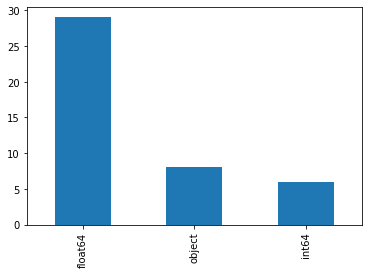

In [44]:
act_wthr.dtypes.value_counts().head(10).plot.bar()

In [45]:
my=[-9999,-9999.00]

m = act_wthr.isin(my).any()
print (m)

Unnamed: 0              False
plant_id                False
datetime_utc            False
datetime_local          False
cloud_cover              True
apparent_temperature    False
temperature             False
humidity                False
dew_point               False
wind_bearing             True
wind_speed               True
wind_chill               True
wind_gust                True
heat_index               True
pressure                 True
qpf                      True
uv_index                 True
snow                     True
pop                      True
fctcode                  True
ozone                    True
precip_accumulation      True
precip_intensity         True
precip_probability       True
precip_type             False
visibility               True
sunrise                 False
sunset                  False
icon                    False
summary                 False
updated_at              False
pwr1                    False
pwr2                    False
pwr3      

In [46]:
df=act_wthr.copy()

In [47]:
df['wind_1'] = np.where(df.wind_bearing == -9999, 1, 0)
df['wind_2'] = np.where(df.wind_speed == -9999, 1, 0)
df['wind_3'] = np.where(df.wind_gust == -9999, 1, 0)
df['prsr_1'] = np.where(df.pressure == -9999, 1, 0)
df['uv_1'] = np.where(df.uv_index == -9999, 1, 0)
df['oz_1'] = np.where(df.ozone == -9999, 1, 0)
df['prc_1'] = np.where(df.precip_intensity == -9999, 1, 0)
df['prob_1'] = np.where(df.precip_probability == -9999, 1, 0)

In [48]:
df["wind_speed"].median()

2.41

In [49]:
df.wind_bearing = df.wind_bearing.replace({-9999:  df["wind_bearing"].median()})
df.wind_speed = df.wind_speed.replace({-9999:  df["wind_speed"].median()})
df.wind_gust = df.wind_gust.replace({-9999:  df["wind_gust"].median()})
df.pressure = df.pressure.replace({-9999: df["pressure"].median()})
df.uv_index = df.uv_index.replace({-9999:  df["uv_index"].median()})
df.ozone = df.ozone.replace({-9999:  df["ozone"].median() })
df.precip_intensity = df.precip_intensity.replace({-9999:  df["precip_intensity"].median() })
df.precip_probability = df.precip_probability.replace({-9999: df["precip_probability"].median() })
df.cloud_cover = df.cloud_cover.replace({-9999:  df["cloud_cover"].median() })
df.apparent_temperature = df.apparent_temperature.replace({-9999: df["apparent_temperature"].median() })
df.temperature = df.temperature.replace({-9999:  df["temperature"].median() })
df.dew_point = df.dew_point.replace({-9999:  df["dew_point"].median()})

In [50]:
my=[-9999,-9999.00]

m = df.isin(my).any()
print (m)

Unnamed: 0              False
plant_id                False
datetime_utc            False
datetime_local          False
cloud_cover             False
apparent_temperature    False
temperature             False
humidity                False
dew_point               False
wind_bearing            False
wind_speed              False
wind_chill               True
wind_gust               False
heat_index               True
pressure                False
qpf                      True
uv_index                False
snow                     True
pop                      True
fctcode                  True
ozone                   False
precip_accumulation      True
precip_intensity        False
precip_probability      False
precip_type             False
visibility               True
sunrise                 False
sunset                  False
icon                    False
summary                 False
updated_at              False
pwr1                    False
pwr2                    False
pwr3      

In [51]:
df.visibility = df.visibility.replace({-9999:  df["visibility"].median()})

In [52]:
df=df.drop(["precip_accumulation","fctcode","pop","snow","qpf","wind_chill","Unnamed: 0","plant_id","datetime_utc"],axis=1)

In [53]:
my=[-9999,-9999.00]

m = df.isin(my).any()
print (m)

datetime_local          False
cloud_cover             False
apparent_temperature    False
temperature             False
humidity                False
dew_point               False
wind_bearing            False
wind_speed              False
wind_gust               False
heat_index               True
pressure                False
uv_index                False
ozone                   False
precip_intensity        False
precip_probability      False
precip_type             False
visibility              False
sunrise                 False
sunset                  False
icon                    False
summary                 False
updated_at              False
pwr1                    False
pwr2                    False
pwr3                    False
pwr4                    False
ghi1                    False
ghi2                    False
ghi3                    False
ghi4                    False
gti1                    False
gti2                    False
gti3                    False
gti4      

In [54]:
df=df.drop(["heat_index"], axis=1)

In [55]:
my=[-9999,-9999.00]

m = df.isin(my).any()
print (m)

datetime_local          False
cloud_cover             False
apparent_temperature    False
temperature             False
humidity                False
dew_point               False
wind_bearing            False
wind_speed              False
wind_gust               False
pressure                False
uv_index                False
ozone                   False
precip_intensity        False
precip_probability      False
precip_type             False
visibility              False
sunrise                 False
sunset                  False
icon                    False
summary                 False
updated_at              False
pwr1                    False
pwr2                    False
pwr3                    False
pwr4                    False
ghi1                    False
ghi2                    False
ghi3                    False
ghi4                    False
gti1                    False
gti2                    False
gti3                    False
gti4                    False
wind_1    

In [56]:
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['rise_year'], df['rise_month'] = df['sunrise'].dt.year, df['sunrise'].dt.month
df['rise_day']=df['sunrise'].dt.day
df['rise_hrs'], df['rise_min']=df['sunrise'].dt.hour,df['sunrise'].dt.minute
df['rise_sec']=df['sunrise'].dt.second

In [57]:
df['sunset'] = pd.to_datetime(df['sunset'])
df['set_year'], df['set_month'] = df['sunset'].dt.year, df['sunset'].dt.month
df['set_day']=df['sunset'].dt.day
df['set_hrs'], df['set_min']=df['sunset'].dt.hour,df['sunset'].dt.minute
df['set_sec']=df['sunset'].dt.second

In [58]:
act_wthr=act_wthr.drop(["sunrise", "sunset","datetime_local"], axis=1)

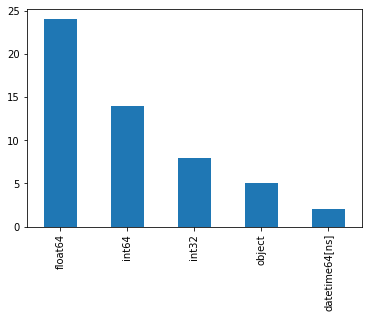

In [59]:
df.dtypes.value_counts().head(10).plot.bar()

In [60]:
df=df.drop(["rise_year", "rise_month", "set_year"], axis=1)
df["diff_hrs"]=df["set_hrs"]-df["rise_hrs"]
df["diff_min"]=df["rise_min"]-df["set_min"]
df["diff_sec"]=df["set_sec"]-df["rise_sec"]

In [61]:
aa=pd.get_dummies(df["summary"])
aa.head()
dd=[df,aa]
df=pd.concat(dd,axis=1)

In [62]:
aa=pd.get_dummies(df["icon"])
aa.head()
dd=[df,aa]
df=pd.concat(dd,axis=1)

# Data visualisation 

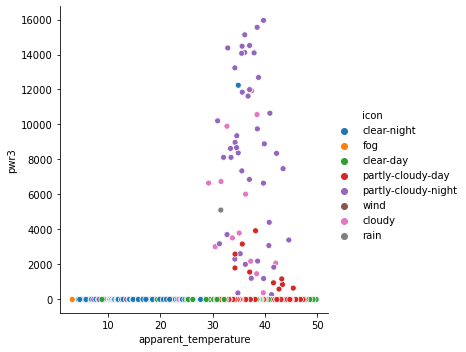

In [63]:
sns.relplot('apparent_temperature','pwr3',hue='icon', data=df)

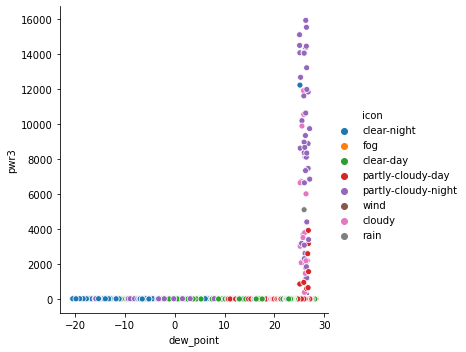

In [64]:
sns.relplot('dew_point','pwr3',hue='icon', data=df)

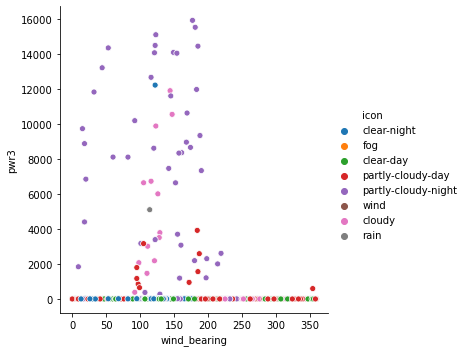

In [65]:
sns.relplot('wind_bearing','pwr3',hue='icon', data=df)

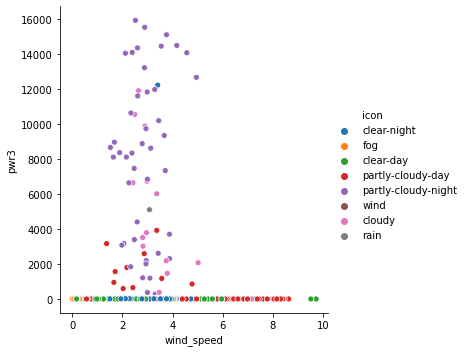

In [66]:
sns.relplot('wind_speed','pwr3',hue='icon', data=df)

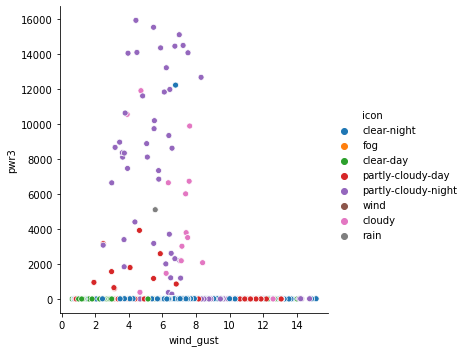

In [67]:
sns.relplot('wind_gust','pwr3',hue='icon', data=df)

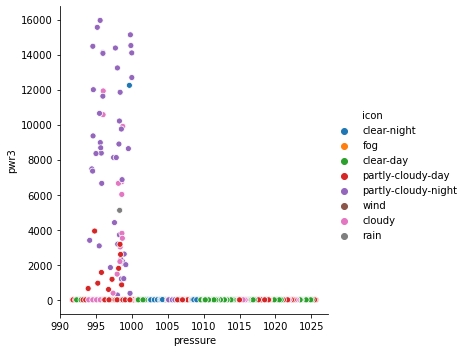

In [68]:
sns.relplot('pressure','pwr3',hue='icon', data=df)

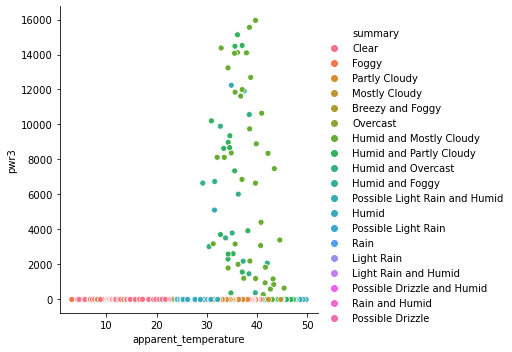

In [69]:
sns.relplot('apparent_temperature','pwr3',hue='summary', data=df)

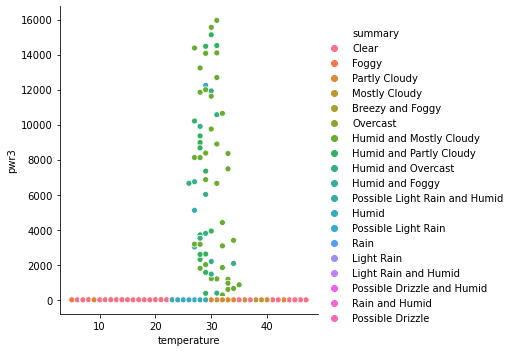

In [70]:
sns.relplot('temperature','pwr3',hue='summary', data=df)

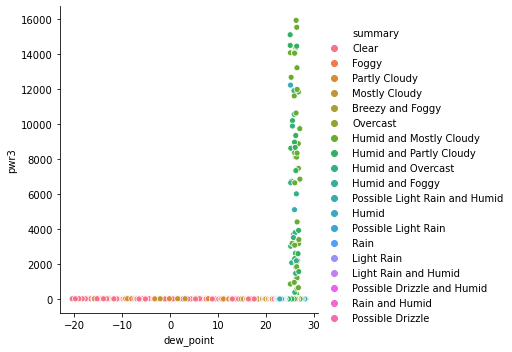

In [71]:
sns.relplot('dew_point','pwr3',hue='summary', data=df)

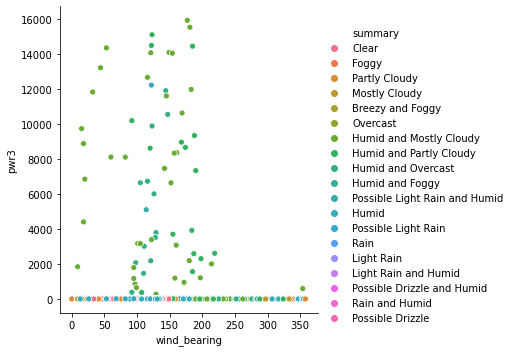

In [72]:
sns.relplot('wind_bearing','pwr3',hue='summary', data=df)

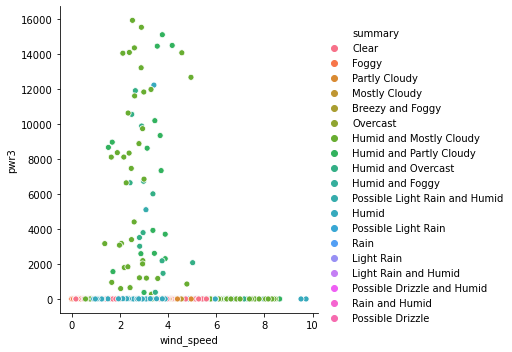

In [73]:
sns.relplot('wind_speed','pwr3',hue='summary', data=df)

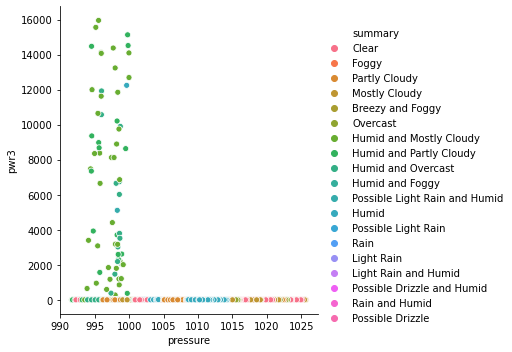

In [74]:
sns.relplot('pressure','pwr3',hue='summary', data=df)

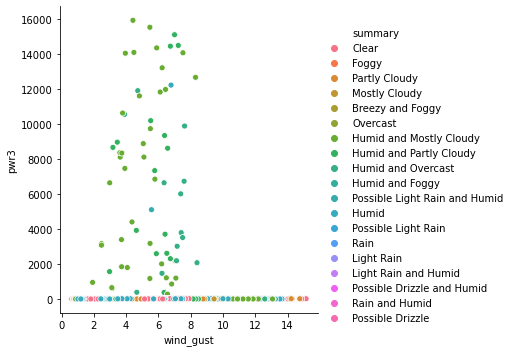

In [75]:
sns.relplot('wind_gust','pwr3',hue='summary', data=df)

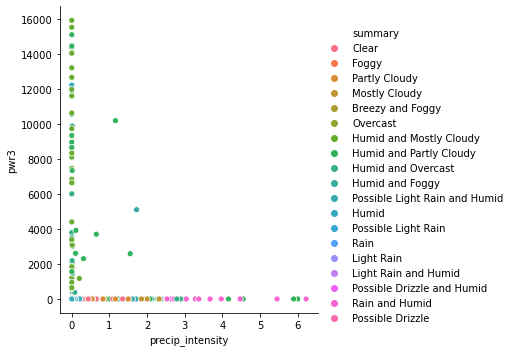

In [76]:
sns.relplot('precip_intensity','pwr3',hue='summary', data=df)

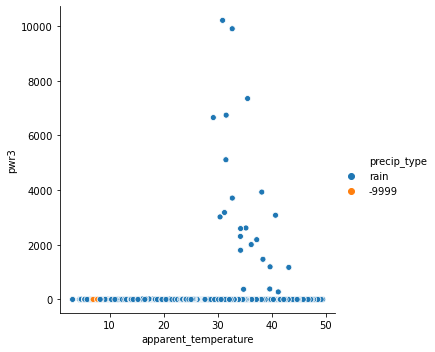

In [77]:
sns.relplot('apparent_temperature','pwr3',hue='precip_type', data=df)

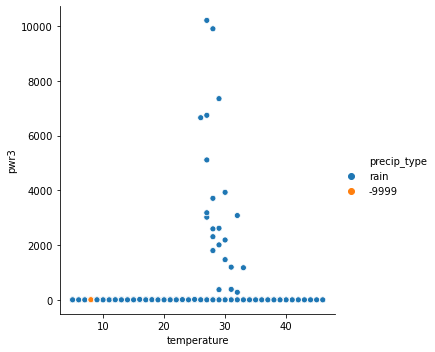

In [78]:
sns.relplot('temperature','pwr3',hue='precip_type', data=df)

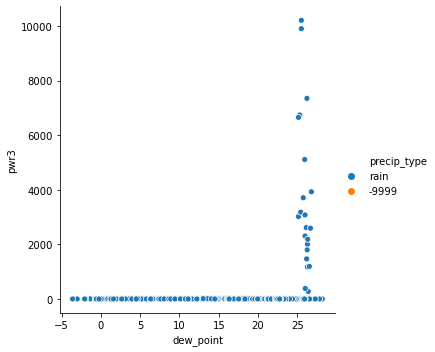

In [79]:
sns.relplot('dew_point','pwr3',hue='precip_type', data=df)

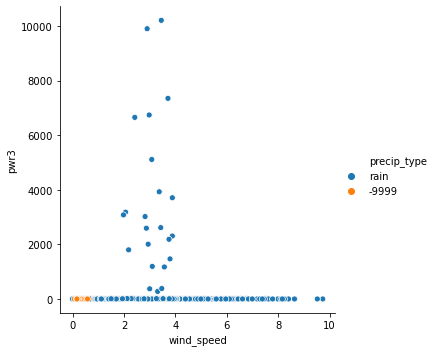

In [80]:
sns.relplot('wind_speed','pwr3',hue='precip_type', data=df)

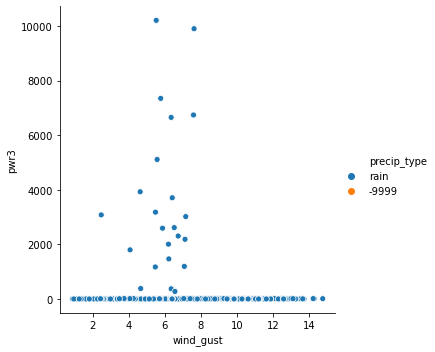

In [81]:
sns.relplot('wind_gust','pwr3',hue='precip_type', data=df)

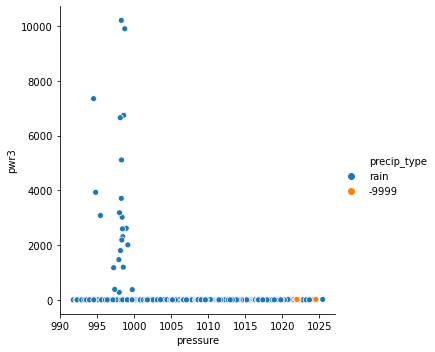

In [82]:
sns.relplot('pressure','pwr3',hue='precip_type', data=df)

In [83]:
df.head()

,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at,pwr1,pwr2,pwr3,pwr4,ghi1,ghi2,ghi3,ghi4,gti1,gti2,gti3,gti4,wind_1,wind_2,wind_3,prsr_1,uv_1,oz_1,prc_1,prob_1,rise_day,rise_hrs,rise_min,rise_sec,set_month,set_day,set_hrs,set_min,set_sec,diff_hrs,diff_min,diff_sec,Breezy and Foggy,Clear,Foggy,Humid,Humid and Foggy,Humid and Mostly Cloudy,Humid and Overcast,Humid and Partly Cloudy,Light Rain,Light Rain and Humid,Mostly Cloudy,Overcast,Partly Cloudy,Possible Drizzle,Possible Drizzle and Humid,Possible Light Rain,Possible Light Rain and Humid,Rain,Rain and Humid,clear-day,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,wind
0,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308.0,0.83,3.07,1007.90,0.0,270.8,0.0,0.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,150.0,2.41,3.07,1006.92,0.0,270.8,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,150.0,2.41,3.07,1006.92,0.0,270.8,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270.0,0.45,3.07,1008.12,0.0,270.8,0.0,0.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,150.0,2.41,3.07,1006.92,0.0,270.8,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [84]:
countinous_variales=['cloud_cover','apparent_temperature','dew_point','wind_bearing','wind_speed','wind_gust',
                    'pressure','ozone', 'visibility']


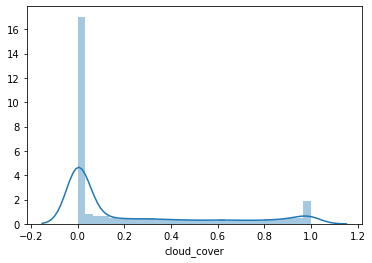

In [85]:
sns.distplot(df['cloud_cover'])

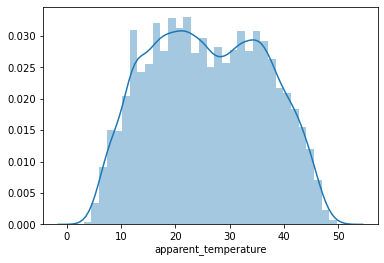

In [86]:
sns.distplot(df['apparent_temperature'])

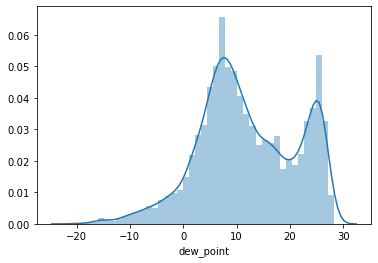

In [87]:
sns.distplot(df['dew_point'])

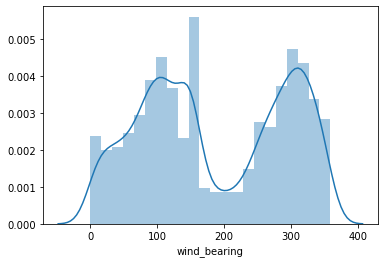

In [88]:
sns.distplot(df['wind_bearing'])

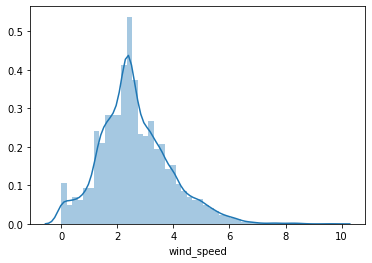

In [89]:
sns.distplot(df['wind_speed'])

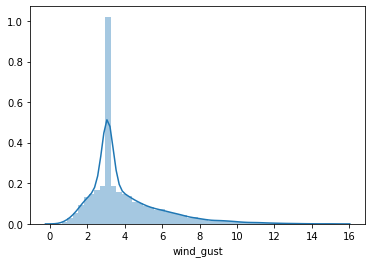

In [90]:
sns.distplot(df['wind_gust'])

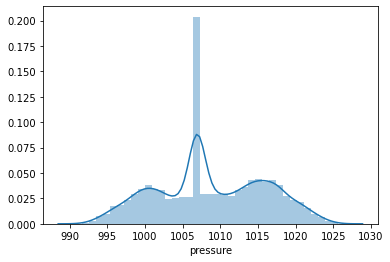

In [91]:
sns.distplot(df['pressure'])

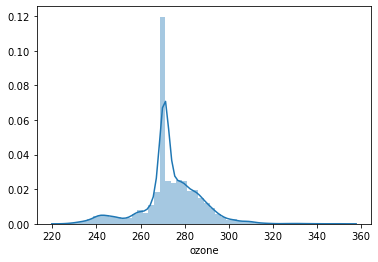

In [92]:
sns.distplot(df['ozone'])

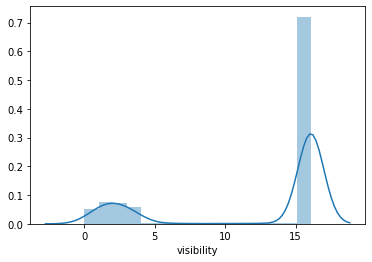

In [93]:
sns.distplot(df['visibility'])

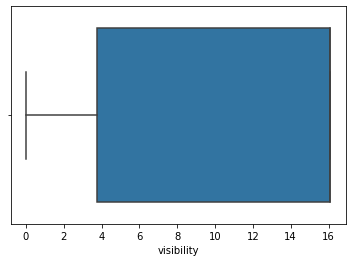

In [94]:
sns.boxplot(df['visibility'])

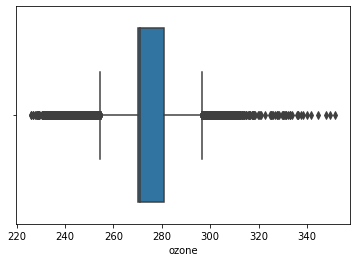

In [95]:
sns.boxplot(df['ozone'])

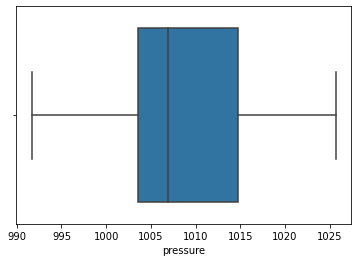

In [96]:
sns.boxplot(df['pressure'])

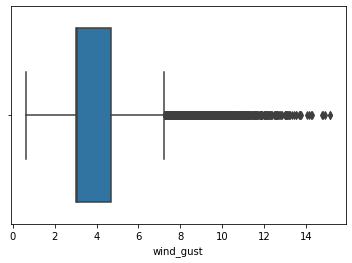

In [97]:
sns.boxplot(df['wind_gust'])

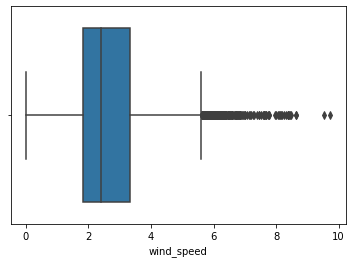

In [98]:
sns.boxplot(df['wind_speed'])

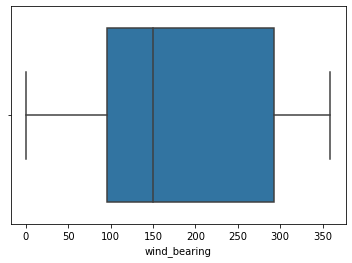

In [99]:
sns.boxplot(df['wind_bearing'])

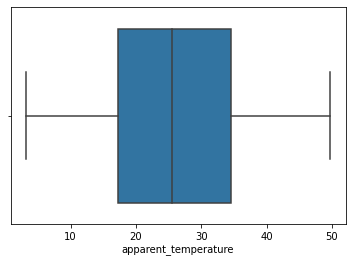

In [100]:
sns.boxplot(df['apparent_temperature'])

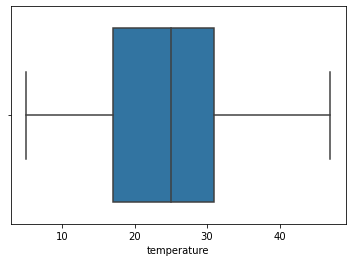

In [101]:
sns.boxplot(df['temperature'])

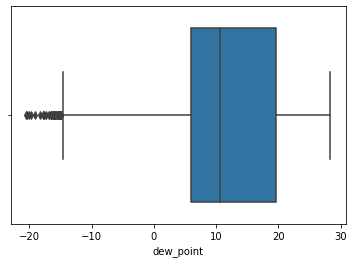

In [102]:
sns.boxplot(df['dew_point'])

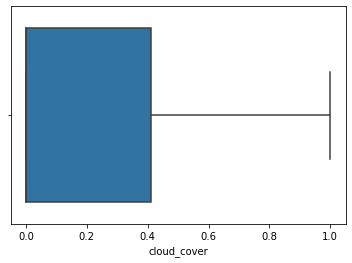

In [103]:
sns.boxplot(df['cloud_cover'])

In [104]:
df=df.drop(["summary","icon", "precip_type"], axis=1)

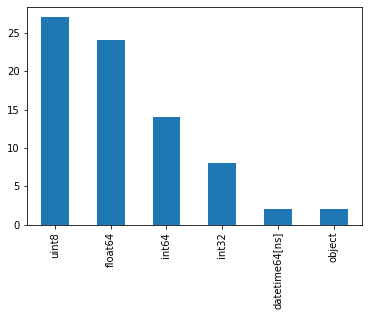

In [105]:
df.dtypes.value_counts().head(10).plot.bar()

In [106]:
aa=df.dtypes=="object"

In [107]:
s=0
for i in range(len(df.columns)):
    if aa[i]==True:
        print(i)

0
17


In [108]:
df.head()

,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,updated_at,pwr1,pwr2,pwr3,pwr4,ghi1,ghi2,ghi3,ghi4,gti1,gti2,gti3,gti4,wind_1,wind_2,wind_3,prsr_1,uv_1,oz_1,prc_1,prob_1,rise_day,rise_hrs,rise_min,rise_sec,set_month,set_day,set_hrs,set_min,set_sec,diff_hrs,diff_min,diff_sec,Breezy and Foggy,Clear,Foggy,Humid,Humid and Foggy,Humid and Mostly Cloudy,Humid and Overcast,Humid and Partly Cloudy,Light Rain,Light Rain and Humid,Mostly Cloudy,Overcast,Partly Cloudy,Possible Drizzle,Possible Drizzle and Humid,Possible Light Rain,Possible Light Rain and Humid,Rain,Rain and Humid,clear-day,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,wind
0,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308.0,0.83,3.07,1007.90,0.0,270.8,0.0,0.0,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,2019-07-16 16:37:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,150.0,2.41,3.07,1006.92,0.0,270.8,0.0,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,2019-07-16 16:37:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,150.0,2.41,3.07,1006.92,0.0,270.8,0.0,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,2019-07-16 16:37:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270.0,0.45,3.07,1008.12,0.0,270.8,0.0,0.0,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,2019-07-16 16:37:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,150.0,2.41,3.07,1006.92,0.0,270.8,0.0,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,2019-07-16 16:37:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [109]:
df=df.drop(["sunrise","sunset","updated_at"], axis=1)

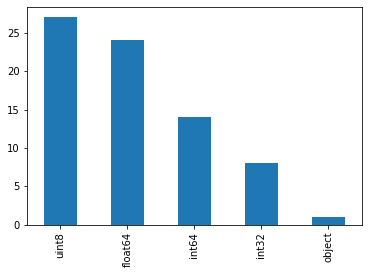

In [110]:
df.dtypes.value_counts().head(10).plot.bar()

In [111]:
df.isnull().sum()

datetime_local          0
cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
                       ..
fog                     0
partly-cloudy-day       0
partly-cloudy-night     0
rain                    0
wind                    0
Length: 74, dtype: int64

In [112]:
df.head()

,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,pwr1,pwr2,pwr3,pwr4,ghi1,ghi2,ghi3,ghi4,gti1,gti2,gti3,gti4,wind_1,wind_2,wind_3,prsr_1,uv_1,oz_1,prc_1,prob_1,rise_day,rise_hrs,rise_min,rise_sec,set_month,set_day,set_hrs,set_min,set_sec,diff_hrs,diff_min,diff_sec,Breezy and Foggy,Clear,Foggy,Humid,Humid and Foggy,Humid and Mostly Cloudy,Humid and Overcast,Humid and Partly Cloudy,Light Rain,Light Rain and Humid,Mostly Cloudy,Overcast,Partly Cloudy,Possible Drizzle,Possible Drizzle and Humid,Possible Light Rain,Possible Light Rain and Humid,Rain,Rain and Humid,clear-day,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,wind
0,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308.0,0.83,3.07,1007.90,0.0,270.8,0.0,0.0,3.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,150.0,2.41,3.07,1006.92,0.0,270.8,0.0,0.0,3.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,150.0,2.41,3.07,1006.92,0.0,270.8,0.0,0.0,3.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270.0,0.45,3.07,1008.12,0.0,270.8,0.0,0.0,3.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,150.0,2.41,3.07,1006.92,0.0,270.8,0.0,0.0,3.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [113]:
df.isnull().sum()

datetime_local          0
cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
                       ..
fog                     0
partly-cloudy-day       0
partly-cloudy-night     0
rain                    0
wind                    0
Length: 74, dtype: int64

In [114]:
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(),4), '% missing values')

pwr1 0.0008 % missing values
pwr2 0.0008 % missing values
pwr3 0.0008 % missing values
pwr4 0.0008 % missing values
ghi1 0.5004 % missing values
ghi2 0.5004 % missing values
ghi3 0.5004 % missing values
ghi4 0.5004 % missing values
gti1 0.5004 % missing values
gti2 0.5004 % missing values
gti3 0.5004 % missing values
gti4 0.5004 % missing values


In [115]:
y=df[["pwr1","pwr2","pwr3","pwr4"]]

In [116]:
df=df.drop(["pwr1","pwr2","pwr3","pwr4","datetime_local"], axis=1)

In [117]:
df=df.drop(["ghi1","ghi2","ghi3","ghi4","gti1", "gti2","gti3","gti4"], axis=1)

In [118]:
df.isnull().sum()

cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
                       ..
fog                     0
partly-cloudy-day       0
partly-cloudy-night     0
rain                    0
wind                    0
Length: 61, dtype: int64

In [119]:
my=[-9999,-9999.00]

m = df.isin(my).any()
print (m)

cloud_cover             False
apparent_temperature    False
temperature             False
humidity                False
dew_point               False
                        ...  
fog                     False
partly-cloudy-day       False
partly-cloudy-night     False
rain                    False
wind                    False
Length: 61, dtype: bool


In [120]:
for i in m:
    if i == True:
        print(yes)

In [121]:
y.isnull().sum()

pwr1    11
pwr2    11
pwr3    11
pwr4    11
dtype: int64

In [122]:
y=pd.DataFrame(y)
y.isnull().sum()
y=y.fillna(y.mean())

In [123]:
y.isnull().sum()

pwr1    0
pwr2    0
pwr3    0
pwr4    0
dtype: int64

In [124]:
df=df.fillna(df.mean())

In [125]:
aa=df.isnull().sum()
for i in aa:
    if i>0:
        print("yes")

In [126]:
import sklearn
import pandas as pd
#import quandl
import math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [127]:
X=np.array(df)
Y=np.array(y)

In [128]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X = mm_scaler.fit_transform(X)
#X=mm_scaler.transform(X)

In [129]:
X_train,X_test,Y_train,Y_test= train_test_split( X, Y, test_size=0.25)

In [130]:
clf=LinearRegression()
clf.fit(X_train, Y_train)
r2_score=clf.score(X_train, Y_train)
print(r2_score)

0.047006434794123135


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [131]:
# for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [132]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, Y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 546325656.902966, tolerance: 332908.09342817817
  positive)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526996793.23062086, tolerance: 322088.59787983156
  positive)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 607189911.6123955, tolerance: 370589.34402291453
  positive)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57675

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [133]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False])

In [134]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = df.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 61
selected features: 51


NameError: name 'sel_' is not defined

In [173]:
selected_feat

Index(['cloud_cover', 'apparent_temperature', 'temperature', 'humidity',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust', 'pressure',
       'uv_index', 'ozone', 'precip_intensity', 'precip_probability',
       'visibility', 'wind_1', 'wind_2', 'wind_3', 'prsr_1', 'uv_1',
       'rise_day', 'rise_hrs', 'rise_min', 'rise_sec', 'set_month', 'set_day',
       'set_hrs', 'set_min', 'set_sec', 'diff_hrs', 'diff_min', 'diff_sec',
       'Clear', 'Foggy', 'Humid', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Light Rain', 'Light Rain and Humid',
       'Mostly Cloudy', 'Overcast', 'Partly Cloudy',
       'Possible Light Rain and Humid', 'Rain', 'Rain and Humid', 'clear-day',
       'clear-night', 'cloudy', 'fog', 'partly-cloudy-day',
       'partly-cloudy-night', 'rain'],
      dtype='object')

In [135]:
new_df=df[selected_feat]

In [136]:
new_df.head()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,wind_1,wind_2,wind_3,prsr_1,uv_1,rise_day,rise_hrs,rise_min,rise_sec,set_month,set_day,set_hrs,set_min,set_sec,diff_hrs,diff_min,diff_sec,Clear,Foggy,Humid,Humid and Mostly Cloudy,Humid and Partly Cloudy,Light Rain,Light Rain and Humid,Mostly Cloudy,Overcast,Partly Cloudy,Possible Light Rain and Humid,Rain,Rain and Humid,clear-day,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain
0,0.0,26.52,26,1,19.46,308.0,0.83,3.07,1007.90,0.0,270.8,0.0,0.0,3.57,0,0,1,0,1,1,0,52,2,10,1,12,45,7,12,7,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.0,28.78,27,1,20.06,150.0,2.41,3.07,1006.92,0.0,270.8,0.0,0.0,3.06,1,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.0,26.58,26,1,19.97,150.0,2.41,3.07,1006.92,0.0,270.8,0.0,0.0,3.06,1,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.0,23.84,23,1,18.66,270.0,0.45,3.07,1008.12,0.0,270.8,0.0,0.0,3.56,0,0,1,0,1,1,0,52,2,10,1,12,45,7,12,7,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.0,24.13,24,1,17.84,150.0,2.41,3.07,1006.92,0.0,270.8,0.0,0.0,3.06,1,1,1,1,1,1,0,52,2,10,1,12,45,7,12,7,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [137]:
kk=np.log(2+df)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [138]:
kk.head()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,wind_1,wind_2,wind_3,prsr_1,uv_1,oz_1,prc_1,prob_1,rise_day,rise_hrs,rise_min,rise_sec,set_month,set_day,set_hrs,set_min,set_sec,diff_hrs,diff_min,diff_sec,Breezy and Foggy,Clear,Foggy,Humid,Humid and Foggy,Humid and Mostly Cloudy,Humid and Overcast,Humid and Partly Cloudy,Light Rain,Light Rain and Humid,Mostly Cloudy,Overcast,Partly Cloudy,Possible Drizzle,Possible Drizzle and Humid,Possible Light Rain,Possible Light Rain and Humid,Rain,Rain and Humid,clear-day,clear-night,cloudy,fog,partly-cloudy-day,partly-cloudy-night,rain,wind
0,0.693147,3.350606,3.332205,1.098612,3.066191,5.736572,1.040277,1.623341,6.917607,0.693147,5.608739,0.693147,0.693147,1.717395,0.693147,0.693147,1.098612,0.693147,1.098612,1.098612,1.098612,1.098612,1.098612,0.693147,3.988984,1.386294,2.484907,1.098612,2.639057,3.850148,2.197225,2.639057,2.197225,1.94591,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
1,0.693147,3.426865,3.367296,1.098612,3.093766,5.023881,1.483875,1.623341,6.916636,0.693147,5.608739,0.693147,0.693147,1.621366,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,0.693147,3.988984,1.386294,2.484907,1.098612,2.639057,3.850148,2.197225,2.639057,2.197225,1.94591,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147
2,0.693147,3.352707,3.332205,1.098612,3.089678,5.023881,1.483875,1.623341,6.916636,0.693147,5.608739,0.693147,0.693147,1.621366,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,0.693147,3.988984,1.386294,2.484907,1.098612,2.639057,3.850148,2.197225,2.639057,2.197225,1.94591,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147
3,0.693147,3.251924,3.218876,1.098612,3.028199,5.605802,0.896088,1.623341,6.917824,0.693147,5.608739,0.693147,0.693147,1.715598,0.693147,0.693147,1.098612,0.693147,1.098612,1.098612,1.098612,1.098612,1.098612,0.693147,3.988984,1.386294,2.484907,1.098612,2.639057,3.850148,2.197225,2.639057,2.197225,1.94591,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
4,0.693147,3.263084,3.258097,1.098612,2.987700,5.023881,1.483875,1.623341,6.916636,0.693147,5.608739,0.693147,0.693147,1.621366,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,0.693147,3.988984,1.386294,2.484907,1.098612,2.639057,3.850148,2.197225,2.639057,2.197225,1.94591,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147


In [139]:
my=['-inf']

m = kk.isin(my).any()
print (m)

cloud_cover             False
apparent_temperature    False
temperature             False
humidity                False
dew_point                True
                        ...  
fog                     False
partly-cloudy-day       False
partly-cloudy-night     False
rain                    False
wind                    False
Length: 61, dtype: bool


In [140]:
dd=kk.columns

In [141]:
s=[]
for i in range(len(m)):
    if m[i] == True:
        print("yes")
        s.append(dd[i])

yes
yes
yes


In [142]:
s

['dew_point', 'diff_min', 'diff_sec']

In [143]:
kk=kk.drop(['dew_point','diff_min','diff_sec'],axis=1)

In [144]:
X=np.array(kk)
Y=np.array(y)

In [145]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X = mm_scaler.fit_transform(X)
#X=mm_scaler.transform(X)

In [146]:
X_train,X_test,Y_train,Y_test= train_test_split( X, Y, test_size=0.25)

In [147]:
clf=LinearRegression()
clf.fit(X_train, Y_train)
accuracy1=clf.score(X_train, Y_train)
print(accuracy1)

0.05020882573299906


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [148]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

In [149]:
from sklearn.metrics import mean_squared_error

In [150]:
from sklearn.tree import DecisionTreeRegressor
dcntree=DecisionTreeRegressor()
dcntree.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [151]:
y_pred=dcntree.predict(X_train)
mean_squared_error(Y_train, y_pred)

0.007514305310601606

In [152]:
y_pred=dcntree.predict(X_test)
mean_squared_error(Y_test, y_pred)

177401.59932679837

In [153]:
from sklearn.ensemble import RandomForestRegressor
rndm=RandomForestRegressor()
rndm.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [154]:
y_pred=rndm.predict(X_train)
mean_squared_error(Y_train, y_pred)

13961.013295809425

In [155]:
y_pred=rndm.predict(X_test)
mean_squared_error(Y_test, y_pred)

79815.69173399608

In [156]:
# We'll be using the Tensorflow backend (default).
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: Future

In [157]:
X.shape

(13608, 58)

In [158]:
def temporalize(X, y, lookback):
    output_X = []
    output_y = []
    for i in range(len(X)-lookback-1):
        t = []
        for j in range(1,lookback+1):
            # Gather past records upto the lookback period
            t.append(X[[(i+j+1)], :])
        output_X.append(t)
        output_y.append(y[i+lookback+1])
    return output_X, output_y

In [159]:
timesteps = 4
X_2, y_1 = temporalize(X = X, y = np.zeros(len(X)), lookback = timesteps)

n_features = 58
X_2 = np.array(X_2)
X_2 = X_2.reshape(X_2.shape[0], timesteps, n_features)

X_2

array([[[0.        , 0.74290958, 0.71241437, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.69926848, 0.65417495, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.70410114, 0.67433041, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.70410114, 0.67433041, ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.69926848, 0.65417495, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.70410114, 0.67433041, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.70410114, 0.67433041, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.6649296 , 0.6331966 , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.70410114, 0.67433041, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.70410114, 0.67433041, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.6649296 , 0.6

In [160]:
X_2.shape

(13603, 4, 58)

In [161]:
y.shape

(13608, 4)

In [162]:
Y=y[5:]

In [163]:
Y.shape

(13603, 4)

In [164]:
Y

,pwr1,pwr2,pwr3,pwr4
5,0.00000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.000000,0.080000
7,0.34000,0.800000,1.400000,2.230000
8,3.13000,6.240000,5.100000,6.080000
9,7.04000,7.910000,8.540000,9.410000
...,...,...,...,...
13614,35.28297,35.392631,37.296307,36.059006
13615,35.28297,35.392631,37.296307,36.059006
13616,35.28297,35.392631,37.296307,36.059006
13617,35.28297,35.392631,37.296307,36.059006


In [165]:
from keras.layers import Input, Dense
from numpy import array
from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

In [166]:
input_layer=Input(shape=(4,58, ))
encoder= LSTM(128,activation='relu',return_sequences=True, )(input_layer)
#encoder=RepeatVector(3)(encoder)
encoder=LSTM(64,activation='relu', return_sequences=True)(encoder)

decoder=LSTM(128,activation='relu',return_sequences=False, )(encoder)
#decoder=RepeatVector(3)(decoder)
decoder=Dense(4)(decoder)

autoencoder=Model(inputs=input_layer,outputs=decoder)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4, 58)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 4, 128)            95744     
_________________________________________________________________
lstm_2 (LSTM)                (None, 4, 64)             49408     
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 244,484
Trainable params: 244,484
Non-trainable params: 0
_________________________________________________________________


In [167]:
autoencoder.compile(metrics=['mse'],
                    loss='mse',
                    optimizer='adam')
reslt=autoencoder.fit(X_2,Y, validation_split=0.2, epochs=10,verbose=1, batch_size=32, shuffle=False)

Train on 10882 samples, validate on 2721 samples
Epoch 1/10
10882/10882 [==============================] - 8s 707us/step - loss: 20.8333 - mse: 20.8333 - val_loss: 1605142.8823 - val_mse: 1605143.5000
Epoch 2/10
10882/10882 [==============================] - 5s 421us/step - loss: 18.1590 - mse: 18.1590 - val_loss: 1604821.2806 - val_mse: 1604821.7500
Epoch 3/10
10882/10882 [==============================] - 5s 415us/step - loss: 16.6681 - mse: 16.6681 - val_loss: 1604250.4475 - val_mse: 1604251.3750
Epoch 4/10
10882/10882 [==============================] - 5s 418us/step - loss: 15.9512 - mse: 15.9512 - val_loss: 1604224.6326 - val_mse: 1604224.8750
Epoch 5/10
10882/10882 [==============================] - 4s 412us/step - loss: 15.3016 - mse: 15.3016 - val_loss: 1603781.8474 - val_mse: 1603782.0000
Epoch 6/10
10882/10882 [==============================] - 5s 417us/step - loss: 14.3075 - mse: 14.3075 - val_loss: 1603457.3518 - val_mse: 1603457.3750
Epoch 7/10
10882/10882 [===============

In [168]:
## Forecast of Power

In [172]:
frc_pwr.shape

(648, 31)

In [169]:
frc_pwr.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,3.08,NaN,6.42,NaN,1008.45,NaN,0,NaN,NaN,NaN,268.6,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,1,1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,2.94,NaN,6.28,NaN,1008.24,NaN,0,NaN,NaN,NaN,269.1,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2,2,1,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,2.82,NaN,6.08,NaN,1007.90,NaN,0,NaN,NaN,NaN,269.7,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
3,3,1,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,2.63,NaN,5.74,NaN,1007.61,NaN,0,NaN,NaN,NaN,270.4,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
4,4,1,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,2.39,NaN,5.30,NaN,1007.51,NaN,0,NaN,NaN,NaN,271.3,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38


In [170]:
my=[-9999,-9999.00]

m = frc_pwr.isin(my).any()
print (m)

Unnamed: 0              False
plant_id                False
datetime_utc            False
datetime_local          False
cloud_cover             False
apparent_temperature    False
temperature             False
humidity                False
dew_point               False
wind_bearing            False
wind_speed              False
wind_chill              False
wind_gust               False
heat_index              False
pressure                False
qpf                     False
uv_index                False
snow                    False
pop                     False
fctcode                 False
ozone                   False
precip_accumulation     False
precip_intensity        False
precip_probability      False
precip_type             False
visibility              False
sunrise                 False
sunset                  False
icon                    False
summary                 False
updated_at              False
dtype: bool


In [171]:
frc_pwr.isnull().sum()

Unnamed: 0                0
plant_id                  0
datetime_utc              0
datetime_local            0
cloud_cover               0
apparent_temperature      0
temperature               0
humidity                  0
dew_point                 0
wind_bearing              0
wind_speed                0
wind_chill              648
wind_gust                 0
heat_index              648
pressure                  0
qpf                     648
uv_index                  0
snow                    648
pop                     648
fctcode                 648
ozone                     0
precip_accumulation     648
precip_intensity          0
precip_probability        0
precip_type             534
visibility                0
sunrise                   0
sunset                    0
icon                      0
summary                   0
updated_at                0
dtype: int64

In [176]:
frc_pwr["cloud_cover"].unique()

array([0.35, 0.43, 0.48, 0.49, 0.51, 0.59, 0.66, 0.69, 0.77, 0.83, 0.78,
       0.7 , 0.61, 0.55, 0.24, 0.09, 0.06, 0.03, 0.  , 0.1 , 0.21, 0.23,
       0.2 , 0.16, 0.07, 0.04, 0.01, 0.14, 0.27, 0.45, 0.47, 0.53, 0.44,
       0.73, 0.75, 0.68, 0.62, 0.58, 0.31, 0.02, 0.15, 0.33, 0.91, 1.  ,
       0.87, 0.12, 0.22, 0.17, 0.74, 0.86, 0.81, 0.6 , 0.39, 0.19, 0.25,
       0.41, 0.54, 0.65, 0.72, 0.76, 0.84, 0.88, 0.95, 0.99, 0.98, 0.97,
       0.96, 0.9 , 0.92, 0.64, 0.67, 0.63, 0.52, 0.4 , 0.28, 0.05, 0.08,
       0.42, 0.32, 0.11, 0.94, 0.8 , 0.34, 0.18, 0.36, 0.13])

In [177]:
frc_pwr["apparent_temperature"].unique()

array([26.41, 25.95, 25.46, 24.8 , 23.99, 24.  , 25.08, 25.69, 26.22,
       29.03, 31.31, 33.07, 34.08, 34.68, 34.97, 34.98, 34.78, 34.1 ,
       33.58, 32.47, 30.73, 29.58, 28.76, 27.97, 26.35, 26.11, 25.82,
       25.34, 24.62, 24.02, 24.61, 25.44, 26.24, 29.17, 30.83, 31.98,
       32.8 , 33.53, 34.31, 35.03, 35.  , 34.37, 33.81, 32.63, 30.95,
       29.96, 29.28, 28.49, 27.82, 26.47, 26.1 , 25.61, 24.82, 25.47,
       25.9 , 27.83, 30.44, 32.39, 32.84, 33.04, 34.2 , 35.41, 36.34,
       33.15, 32.29, 31.33, 30.54, 29.91, 29.36, 28.6 , 27.7 , 26.28,
       24.79, 24.05, 24.18, 24.63, 24.92, 25.5 , 27.84, 29.79, 31.47,
       32.61, 33.21, 33.57, 33.75, 33.55, 33.  , 31.18, 29.44, 28.83,
       28.23, 27.62, 26.12, 25.6 , 24.99, 24.34, 23.54, 22.6 , 22.64,
       23.57, 24.11, 24.56, 25.99, 28.52, 30.22, 31.56, 32.54, 33.36,
       33.92, 34.14, 32.04, 30.71, 29.18, 28.1 , 26.66, 25.16, 24.57,
       23.87, 23.  , 22.24, 22.18, 23.04, 24.16, 25.12, 27.53, 30.67,
       31.94, 32.89,